In [ ]:
from bokeh.sampledata.autompg import autompg_clean as df
from matplotlib.backends.backend_agg import FigureCanvas
from matplotlib.figure import Figure
from sklearn.ensemble import IsolationForest 
import holoviews as hv
import hvplot.pandas
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import panel as pn
import panel.widgets as pnw

In [ ]:
hv.extension('bokeh')
pn.extension('tabulator')
PALETTE = ["#ff6f69", "#ffcc5c", "#88d8b0", ]

In [ ]:
%matplotlib inline

def mpl_plot1(data):
    #variable='Poverty'
    q_s = data.quantile([.02,.09,.25,.5,.75,.91,.98])
    #fig = mpf.figure(figsize=(10, 7), style=s)
    fig = plt.figure(figsize=plt.figaspect(2.))
    fig.suptitle('A tale of 2 subplots')
    #fig = Figure()
    #FigureCanvas(fig) # not needed in mpl >= 3.1
    ax1 = fig.add_subplot(4,2,1)
    ax2 = fig.add_subplot(4,2,2)#, sharex=ax1)
    ax3 = fig.add_subplot(4,2,3)#, sharex=ax1)
    ax4 = fig.add_subplot(4,2,4)#, sharex=ax1)
    #print(data.columns)
    #
    data.hist(bins=list(q_s.iloc[:,0]),ax=ax1)
    q_s.plot(ax=ax2)
    #ax2.axvline(x=data.quantile([.02,.09,.25,.5,.75,.91,.98]).loc[0.5], color='b', label='axvline - full height')
    ax4.scatter(data,df['Poverty'])
    ax3.boxplot(data)
    return fig

def find_outliers1(variable='Poverty', view_fn1=mpl_plot1):
    #for c in check:
    data = df.sort_values(by=variable,ascending=True).copy().set_index('States')[[variable]]

    return(view_fn1(data))


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/thistleknot/Python-Stock/master/data/raw/states.csv") 

Row
    [0] ParamFunction(function)
    [1] Column
        [0] Markdown(str)
        [1] Select(name='variable', options=['Poverty', 'Infant Mort',...], value='Poverty')
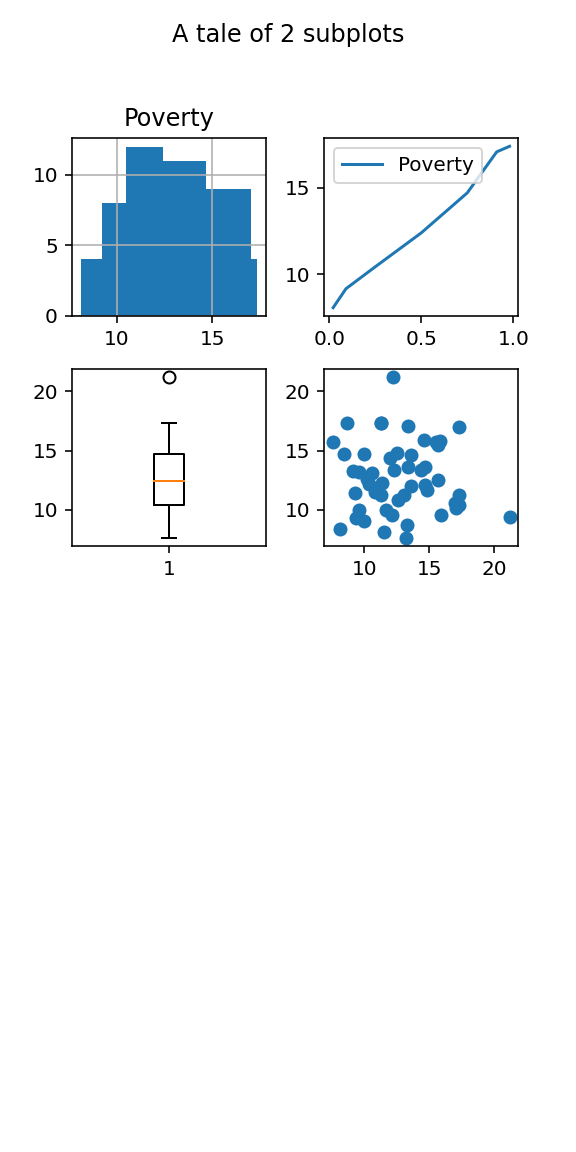

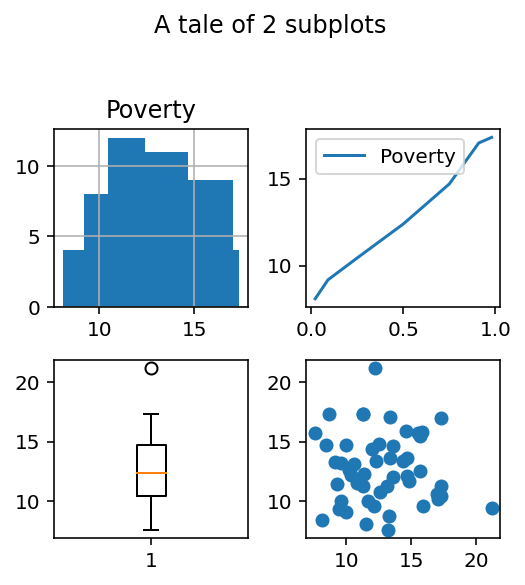

In [261]:
variable  = pnw.Select(name='variable', value='Poverty', 
                                 options=list(df.columns)[1:])

quantiles = pn.widgets.RadioButtonGroup(
    name='Quantiles', 
    options=[.02,.09,.25,.5,.75,.91,.98],
    button_type='success'
)

'''
checkbox_group = pn.widgets.CheckBoxGroup(
    name='Checkbox Group', options=list(df.columns),
    inline=True)

window  = pnw.IntSlider(name='window', value=10, start=1, end=60)
'''

reactive_outliers1 = pn.bind(find_outliers1, variable)

widgets1   = pn.Column("OGive", variable)
outliers1 = pn.Row(reactive_outliers1, widgets1)

outliers1